### The projection in the metadata is incorrect.

In [2]:
# import packages
import os
from os import listdir
import re
import torch
from torch.utils.data import Dataset, DataLoader, sampler
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
from rasterio.features import rasterize
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import shapely

In [2]:
image_dir =  r'C:\Users\Fabian\Documents\Masterarbeit_Daten\API_test3\S2A_MSIL2A_20230301T100021_N0509_R122_T33UVP_20230301T142802'

In [3]:
# create dict to store filenames with bands as keys
band_file_map = {
    "B02": None, # blue
    "B03": None, # green
    "B04": None, # red
    "B08": None, # NIR
}

filename_regex = r"""^T(?P<tile>\d{2}[A-Z]{3})_(?P<date>\d{8}T\d{6})_(?P<band>B0\d{1})(?:_(?P<resolution>\d{2}m))?\..*$"""

# fill dict with paths and extract tile
for filename in os.listdir(image_dir):
    match = re.search(filename_regex, filename)
    if match:
        tile = match.group("tile")

    for band_name in band_file_map.keys():
        if filename.endswith(f"{band_name}_10m.jp2"):
            band_file_map[band_name] = os.path.join(image_dir, filename)
            break

# Verify that all required bands have been found
missing_bands = [band_name for band_name, file_path in band_file_map.items() if file_path is None]
if missing_bands:
    raise Exception(f"Missing band files: {missing_bands}")

# store open DatasetReaders in dict 
bands = {band_name: rasterio.open(file_path) for band_name, file_path in band_file_map.items()}

In [4]:
metadata = bands["B02"].meta.copy()

In [5]:
metadata

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.0, 0.0, 399960.0,
        0.0, -10.0, 5400000.0)}

In [28]:
image_dir = r'C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local\test_images_geotiff'
masks_dir = r'C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local\test_mask_patches'
filename = '32UPC_21_2023-5-9.tif'

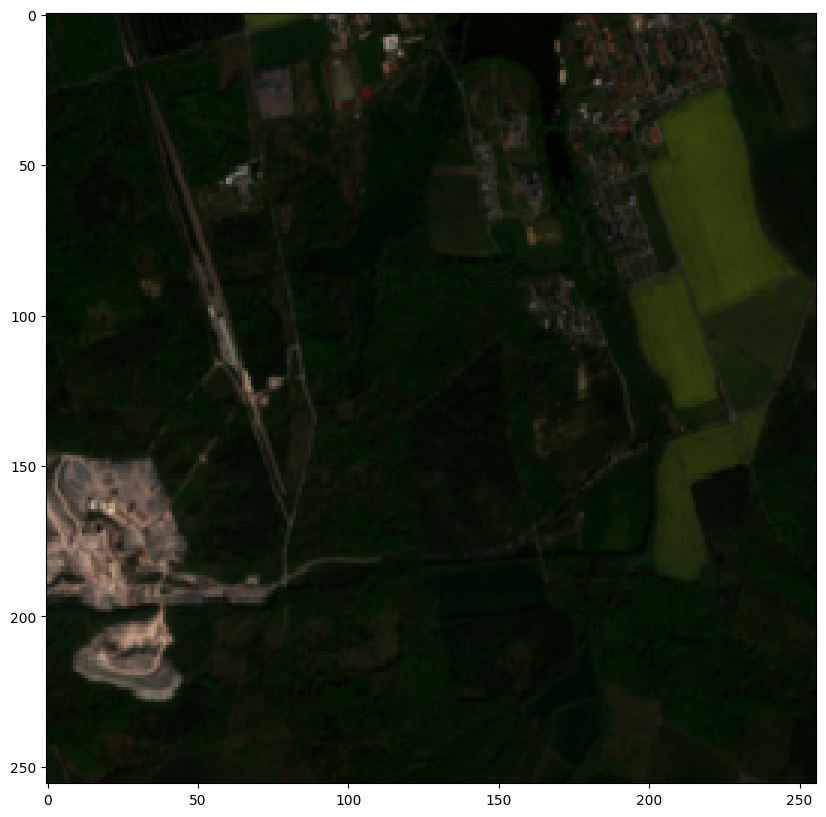

In [29]:
image = rasterio.open(os.path.join(image_dir, filename)).read()
mask = rasterio.open(os.path.join(masks_dir, filename)).read()

plt.figure(figsize=(10, 10))
plt.imshow(image[1:4].transpose((1,2,0)))
plt.imshow(mask[0], cmap='jet', alpha=0.5*mask[0])